In [6]:
"""
Author: Amarade Punfueng
Date Created: 14 May 2021
Last Edit: 23 May 2021

This python script reads chess games that are stored in Portable Game Notation (PGN).This script has method for filtering
game data, separate the moves of the white player and the black player into its file, Make a data frame that collects the counts of the first moves per game and returns a tuple
that contains two data frames: one for white moves, and one for black move, And Plot the ten most common first moves for combined
black and white move
"""
class chess_game:
    def __init__(self,game):
        self.chess_game = game
        
    def game_string(self):
        import re             
        file_input = open(self.chess_game,"r",errors='ignore')
        raw_file = file_input.read()
        file_input.close()    
        
        chess_game = re.sub('[[].*[]]','', raw_file) #Removing all text between "[]" including "[]"            
        chess_game = re.sub('[\d]-[\d]', '', chess_game)  #Removing any digit that comes in front and after - including -      
        chess_game = re.sub('[\d]//[\d]', '', chess_game) #Removing any digit that comes in front and after / including /
        chess_game = re.sub('^\s*$\s?', '', chess_game) #Removing all whitespace between game
        chess_game = chess_game.replace('\n', ' ') #Removing newline between game
        chess_game = re.sub('\\b1\\b','\n1',chess_game) #Put newline in front of 1. # Refer : https://stackoverflow.com/questions/13009253/b-vs-b-in-regex
        chess_game = chess_game.lstrip() #Remove new line for the first game
 
        file_output = open('game_string.txt','w')
        file_output.write(chess_game)
        file_output.close()
        
        return 'game_string.txt'
        
    def sub_files(self) :
        import os
        import re
        file_input = open(self.game_string(),"r")
        lines = file_input.readlines()       
        file_input.close()
           
        #Create new folder 'sub_file' 
        folder_name = 'sub_file'
        if not os.path.exists(folder_name): #If sub_file isn't already existed, It will create the folder
            os.mkdir(folder_name)
            
        #Access folder 'sub_file'
        orig_path = os.getcwd()
        new_path = orig_path + "\\" + folder_name
        os.chdir(new_path)        
        
        #Access each game
        for c in range(0, len(lines)):
            white = []
            black = []
            a = lines[c]            
            x = re.sub('\d+\.','',a)  #Remove the digit+dot Example 1. 2.
            x = list(x.split())
            
            #Access each move in c games:
            for i in range(0, len(x)):                
                if i % 2: #every even move will be black move
                    black.append(x[i])                                          
                else : #every odd move will be white move
                    white.append(x[i])

            game_num = c+1 # c will start at index 0 for game 1
            
            #Saving the file in format = game_num + white/black.txt
            white = " ".join(white)
            file_output_w = open(str(game_num)+'w.txt','w')
            file_output_w.write(white)
            file_output_w.close()

            black = " ".join(black)
            file_output_b = open(str(game_num)+'b.txt','w')
            file_output_b.write(black)
            file_output_b.close()
                
        os.chdir(orig_path) #Return to original path
        
                
    def data_frame(self):
        import re
        import pandas as pd
        file_input = open(self.game_string(),"r")
        lines = file_input.readlines()
        file_input.close()
        
        #Create empty list
        white = []
        black = []

        try:
            for i in range(len(lines)):
                a = lines[i]
                x = re.sub('\d+\.','',a) #Remove the digit+dot('.')
                x = list(x.split()) #Convert to list
                white.append(x[0]) #Append white first move which is the index 0
                black.append(x[1]) #Append black first move which is the index 1
        except IndexError: #Some game have no black move
            pass 

        freq_white = {} #Create dict to stored each count for white first move
        for m in white:
            if m in freq_white:
                freq_white[m] += 1
            else:
                freq_white[m] = 1

        freq_black = {} #Create dict to stored each count for black first move
        for m in black:
            if m in freq_black:
                freq_black[m] += 1
            else:
                freq_black[m] = 1
                
        #Create dataframe for white and black first move
        white_df = pd.DataFrame(list(freq_white.items()),columns = ['White move','Count'])    
        black_df = pd.DataFrame(list(freq_black.items()),columns = ['Black move','Count'])
        
        #Sort the 'Count' by descending
        white_df = white_df.sort_values(['Count'],ascending=False)
        black_df = black_df.sort_values(['Count'],ascending=False)
        
        #Rename the index name to rank and plus + to use the index column as rank
        white_df = white_df.reset_index(drop=True) 
        white_df.index = white_df.index +1
        white_df.index.name = 'Rank'
        
        black_df = black_df.reset_index(drop=True)
        black_df.index = black_df.index +1
        black_df.index.name = 'Rank'
        
        return white_df,black_df
    
    def bar_plot(self):
        import pandas as pd
        
        white_df = self.data_frame()[0]
        black_df = self.data_frame()[1]
        
        #Rename the White move/Black move to First move
        white_df.rename(columns = {'White move':'First move'}, inplace = True) 
        black_df.rename(columns = {'Black move':'First move'}, inplace = True)
        
        
        #Add Column color in both dataframe but add value 'White' for white_df and 'Black' for black_df
        white_df['Color'] = 'White'
        black_df['Color'] = 'Black'
       
        #Concatenate table white_df,black_df
        Combined = [white_df,black_df]
        Top_ten_move = pd.concat(Combined)
        
        #Sort the 'Count' by descending
        Top_ten_move = Top_ten_move.sort_values(['Count'],ascending=False)
        
        #Query for only top ten first move count
        Top_ten_move = Top_ten_move.head(10)
        
        #Assign the color if it is the white first move, the bar will be red. 
        #If it is the black first move,the bar will be green
        colors = {'White':'Red', 'Black':'Green'}        
        Bar_top = Top_ten_move.plot.bar(x='First move', y='Count', rot=0, color= Top_ten_move['Color'].map(colors)) 


In [7]:
p1 = chess_game('chess_game.pgn')
p1.game_string()
p1.sub_files()

In [10]:
p1.data_frame()

(     White move  Count
 Rank                  
 1            d4    588
 2            e4    360
 3            c4    134
 4           Nf3    122
 5            e3      3
 6            g3      2,
      Black move  Count
 Rank                  
 1           Nf6    541
 2            c5    227
 3            d5    160
 4            e5    111
 5            e6     59
 6            g6     43
 7            c6     30
 8            d6     20
 9            f5     14
 10          Nc6      3)

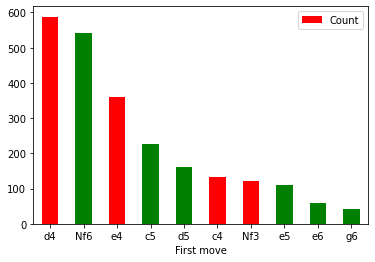

In [11]:
p1.bar_plot()